# Plan

## 1. Superpixel, Words
## 2. SP-Graph
## 3. Bag of Words (BOW)
## 4. Distance measure
## 5. Merging

# Vorbereitung

In [2]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'nearest'

import numpy as np
from matplotlib import pyplot as plt

<class 'numpy.ndarray'>
1644300


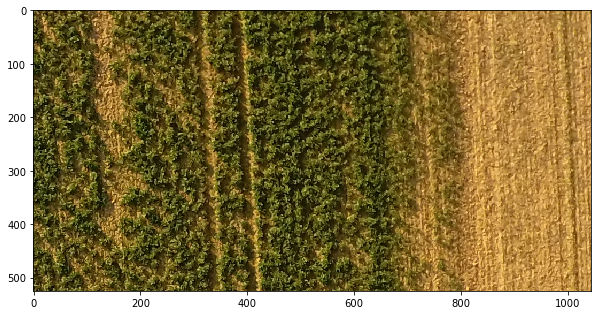

In [3]:
from skimage import io

image = io.imread('/home/hre070/MA/DJI_0095_CLIP.jpg')
#image = io.imread('/home/hre070/MA/dji_full.jpg')
#image = io.imread('/home/hre070/MA/Pics_Kalkofen/DJI_0095.JPG')

print(type(image))
print(image.size)

f, ax = plt.subplots(figsize=(10, 10))

ax.imshow(image);

In [4]:
print(type(image.shape))

<class 'tuple'>


# Superpixel, Words

In [5]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

In [6]:
#SLIC
segments_slic = slic(image, n_segments=150, compactness=10, sigma=1)
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))

SLIC number of segments: 82


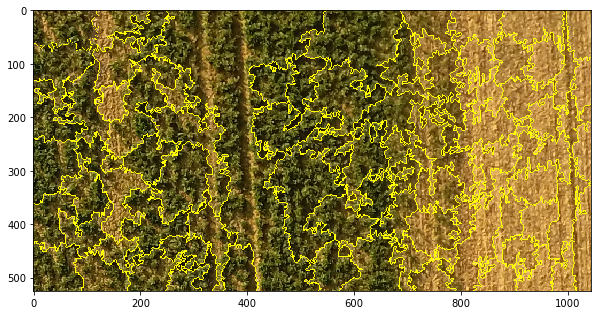

In [7]:
f, ax = plt.subplots(figsize=(10, 10))

ax.imshow(mark_boundaries(image, segments_slic));


In [8]:
#IMPORTS
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage.color import label2rgb
from skimage.color import rgb2gray

im_gray = rgb2gray(image)

print(im_gray.max(), im_gray.min())

0.909417254902 0.00666666666667


In [9]:
# DEFINE MOC LBP FUNCTION
def moc_lbp(img_param, words=8):
    return(np.random.randint(words, size=img_param.shape))

In [10]:
# settings for LBP
METHOD = 'ror'
radius = 1
n_points = 8 * radius

#lbp = local_binary_pattern(im_gray, n_points, radius, METHOD)
lbp = moc_lbp(im_gray)

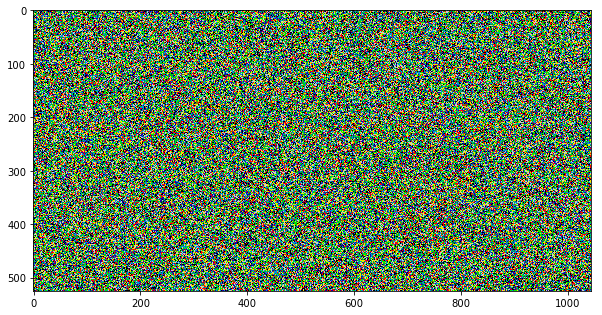

In [11]:
f, ax = plt.subplots(figsize=(10, 10))

#ax.imshow(image)
ax.imshow(lbp, cmap=plt.cm.spectral, alpha=1 )

# RAG construction

In [11]:
#Imports
from skimage.future import graph
import networkx as nx
from itertools import repeat

In [12]:
G = graph.RAG(segments_slic, connectivity=2)

In [13]:
print(nx.info(G))

Name: 
Type: RAG
Number of nodes: 82
Number of edges: 208
Average degree:   5.0732


In [14]:
#initial test
word_count = 8
test = dict(zip(range(word_count),repeat(0, word_count)))
print(test)

bow_tuple = (dict(zip(range(word_count),repeat(0, word_count))) for node in G)

bow_attr_dict = dict(zip(G, bow_tuple))
#print(bow_attr_dict)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}


In [15]:
#Set the empty BOWs as attributes
nx.set_node_attributes(G, "BOW", bow_attr_dict)

In [16]:
print(G.node[23])

{'BOW': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}}


In [17]:
G.number_of_nodes()

82

## BOW histogram computation

In [18]:
print(lbp[1, 1])

print(np.unique(lbp))

print(lbp.shape)

4
[0 1 2 3 4 5 6 7]
(525, 1044)


In [19]:
i = 0
for a, b in np.nditer([segments_slic, lbp]):
    print("slic iter", a, "lbp iter", b)
    print("slic index", segments_slic[0,i], "lbp index", lbp[0,i])
    i += 1
    if i == 5:
        break
        

slic iter 0 lbp iter 2
slic index 0 lbp index 2
slic iter 0 lbp iter 3
slic index 0 lbp index 3
slic iter 0 lbp iter 5
slic index 0 lbp index 5
slic iter 0 lbp iter 7
slic index 0 lbp index 7
slic iter 0 lbp iter 7
slic index 0 lbp index 7


In [20]:
print(type(int(segments_slic[0,0])))
print(lbp[0,0])

<class 'int'>
2


In [21]:
for a, b in np.nditer([segments_slic, lbp]):
    G.node[int(a)]["BOW"][int(b)] += 1

In [22]:
G.node[9]

{'BOW': {0: 447, 1: 484, 2: 457, 3: 489, 4: 504, 5: 466, 6: 463, 7: 482}}

### BOW_RAG class test:

In [12]:
import sys
sys.path.append('/home/hre070/MA/TextureSeg/')

#from bowrag import BOW_RAG, cumu_diff
import bow_rag

In [13]:
test = bow_rag.BOW_RAG(segments_slic, lbp, bins=(0,1,2,3,4,5,6,7))

In [14]:
test.node[24]

{'bow': {0: 1023,
  1: 1024,
  2: 1030,
  3: 1055,
  4: 1049,
  5: 1005,
  6: 995,
  7: 1022},
 'labels': [24],
 'pixel count': 8203}

In [15]:
test.calc_edge_weights()


In [22]:
x = sorted(list(data['weight'] for n1,n2,data in test.edges(data=True)))

In [23]:
type(x)

list

In [ ]:
for node, data in test.nodes_iter(data=True):
    for key, value in data["bow"].items():
        data["bow"][key] = round((value/data["pixel count"])*100, 3)
    break
    

In [ ]:
labels_map = np.arange(segments_slic.max() + 1)

print(labels_map)

In [ ]:
test.node[5]


In [ ]:
for ix, (n, d) in enumerate(test.nodes_iter(data=True)):
    for label in d['labels']:
        label_map[label] = ix
